In [1]:
from statistics import correlation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
file_path = '.\diabetes_binary_classification_data.csv'
data = pd.read_csv(file_path)

## Exploring data

In [3]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

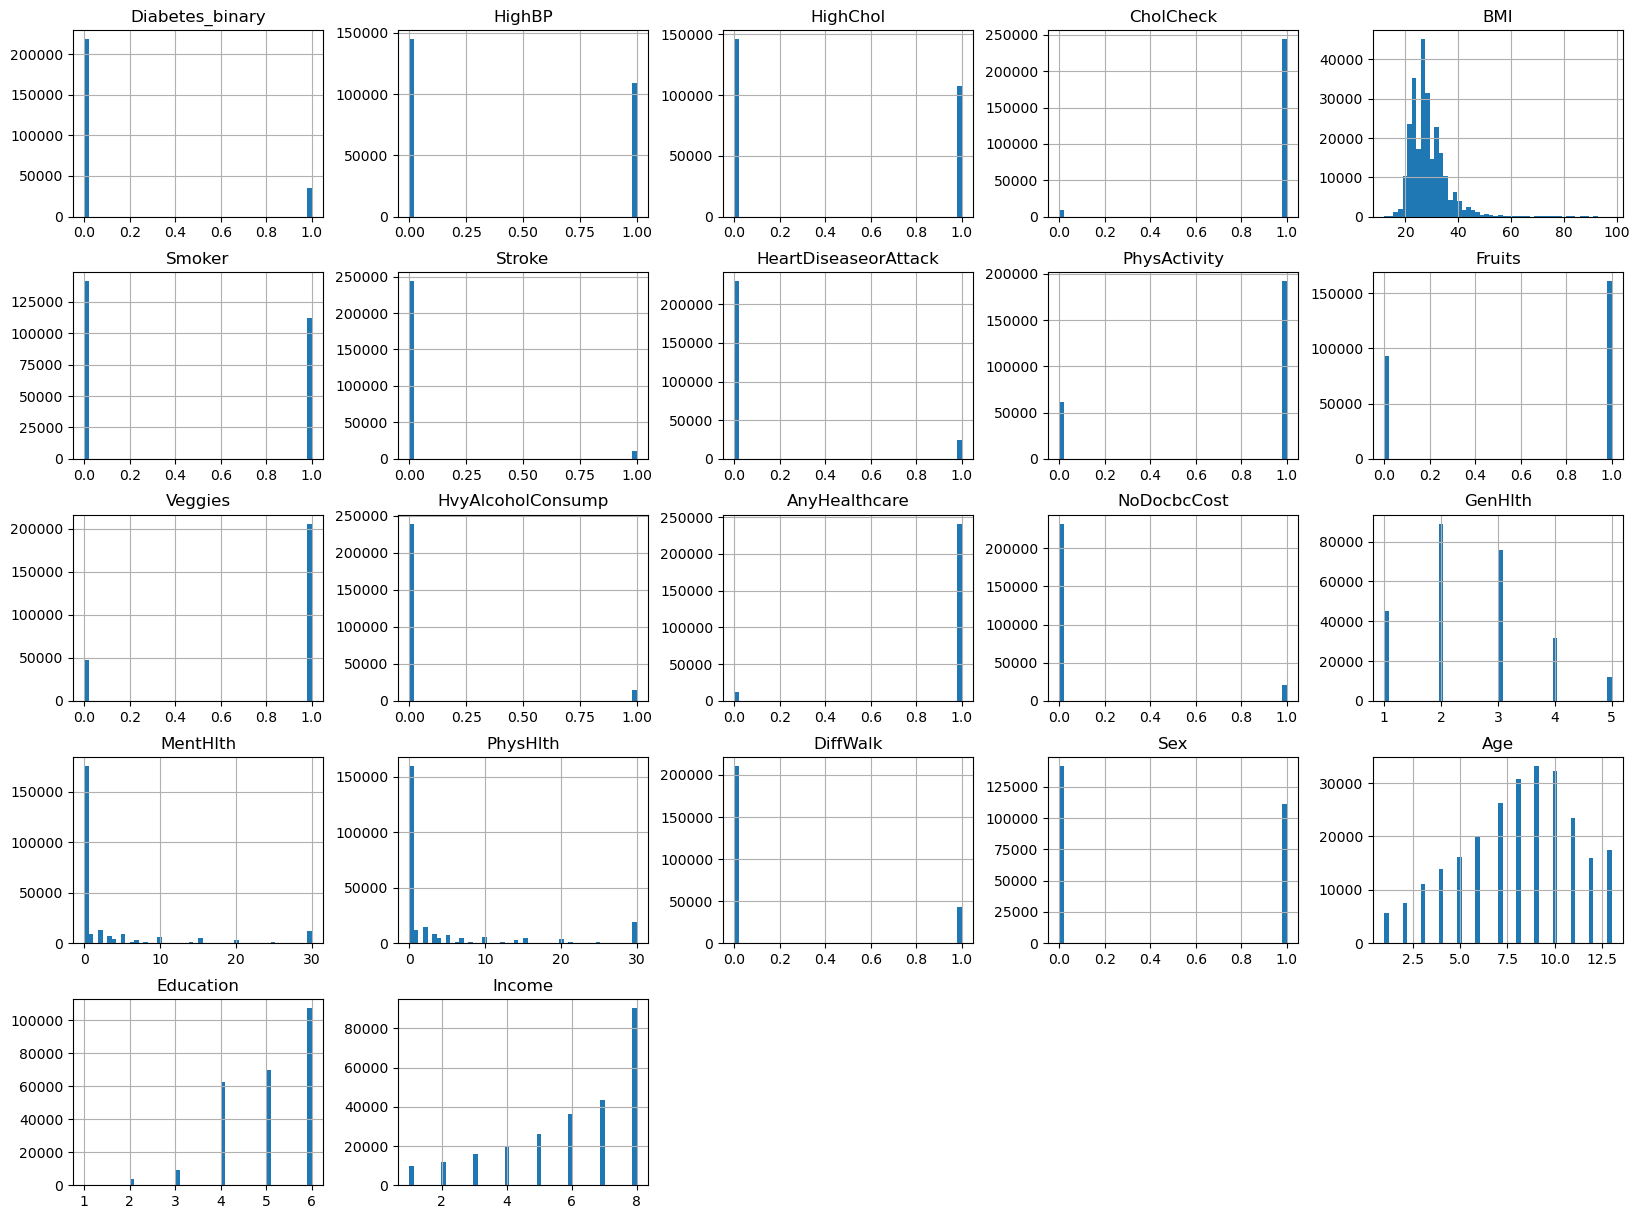

In [6]:
data.hist(bins = 50, figsize = (20,15))

In [7]:
correlations = data.corr()
correlations["Diabetes_binary"].sort_values(ascending = False)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64

No features have a high correlation with our target feature *Diabetes_binary*. Let us however look at the feature with the highest correlation, *GenHlth*.

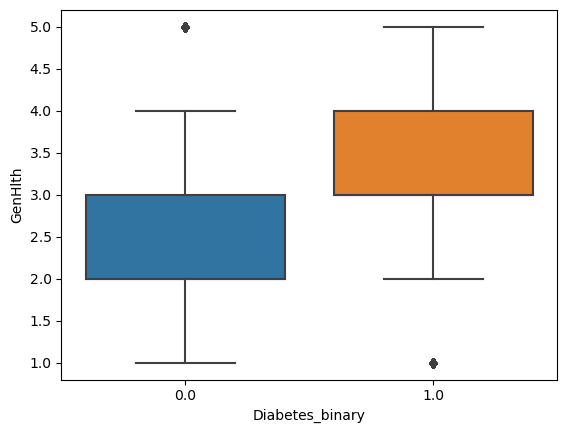

In [8]:
sns.boxplot(x = "Diabetes_binary", y = "GenHlth", data = data)
plt.show()

Here, we see that the majority of people **without** diabetes would say their general health is between very good and good, while the majority
of people **with** diabetes would say their general health is between good and fair.

## Data Preproccesing

In [9]:
x = float("nan")
math.isnan(x)

True

<Axes: >

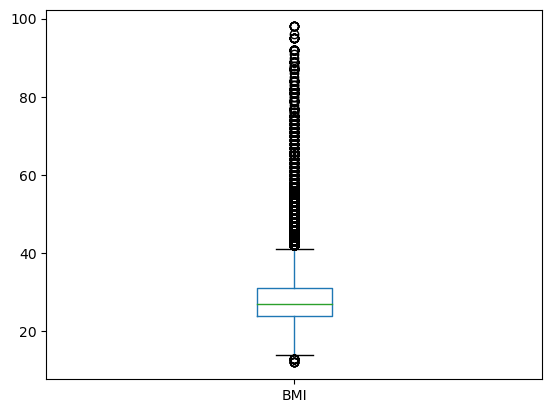

In [10]:
data.boxplot(column = ["BMI"], grid = False)

In [11]:
df = data.copy()
columns_to_scale = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6,0.5,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.500000,1.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0,1.0,1.0,0.0,0.666667,0.6,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.833333,0.4,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,0.8,0.428571


## Split the data into test and train set


In [12]:
X = data.drop("Diabetes_binary", axis = 1)
Y = data["Diabetes_binary"]

#train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(X_train.shape, "Train instances")
print(X_test.shape, "Test instances")

(202944, 21) Train instances
(50736, 21) Test instances


## Logistic regression

In [13]:
logistic_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

logistic_model.fit(X_train, Y_train)

y_pred = logistic_model.predict(X_test)

logistic_report = classification_report(Y_test, y_pred)

logistic_confusion_matrix = confusion_matrix(Y_test, y_pred)


print(logistic_confusion_matrix)
print(logistic_report)

[[31663 12076]
 [ 1560  5437]]
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     43739
         1.0       0.31      0.78      0.44      6997

    accuracy                           0.73     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.73      0.77     50736



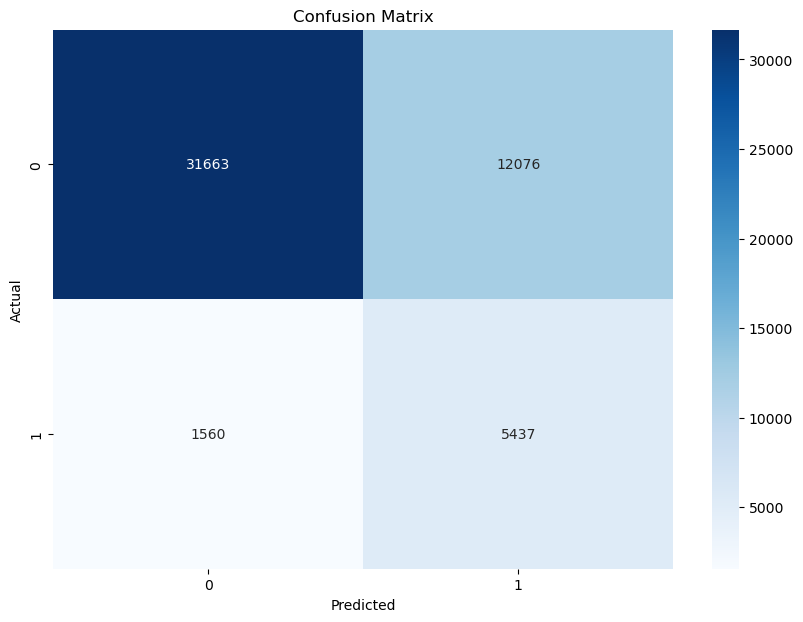

In [14]:
# Plotting the confusion matrix heatmap for logistic regression
plt.figure(figsize=(10,7))
plt.title("Confusion Matrix")
sns.heatmap(logistic_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [31]:
sensitivity = logistic_confusion_matrix[1][1] / (logistic_confusion_matrix[1][0] + logistic_confusion_matrix[1][1])
specificity = logistic_confusion_matrix[0][0] / (logistic_confusion_matrix[0][0] + logistic_confusion_matrix[0][1])

print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

Sensitivity: 0.78
Specificity: 0.72


## Random Forest

In [15]:
random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest_model.fit(X_train, Y_train)

y_pred_rf = random_forest_model.predict(X_test)

rf_report = classification_report(Y_test, y_pred_rf)
rf_confusion_matrix = confusion_matrix(Y_test, y_pred_rf)

print(rf_report)
print(rf_confusion_matrix)

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.45      0.16      0.23      6997

    accuracy                           0.86     50736
   macro avg       0.66      0.56      0.58     50736
weighted avg       0.82      0.86      0.83     50736

[[42388  1351]
 [ 5892  1105]]


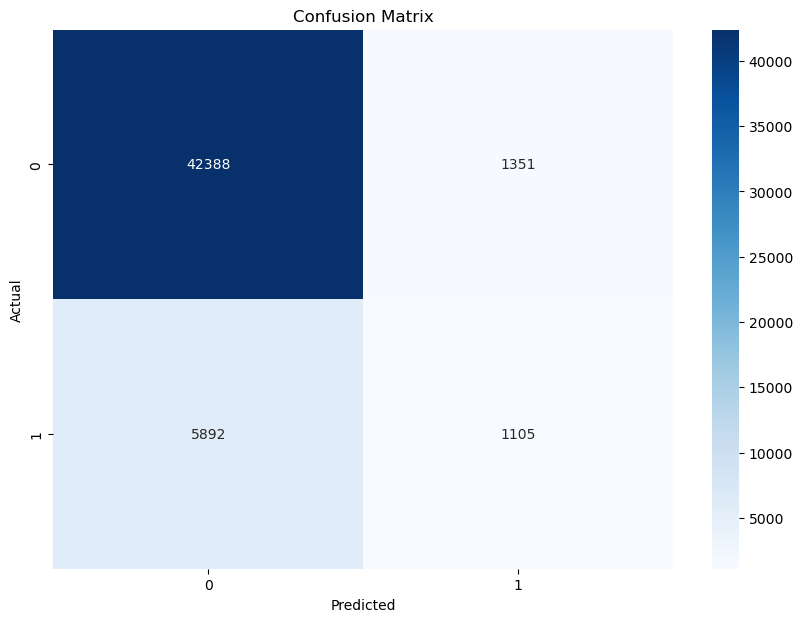

In [16]:
# Plotting the confusion matrix heatmap for Random Forest
plt.figure(figsize=(10,7))
plt.title("Confusion Matrix")
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [32]:
sensitivity = rf_confusion_matrix[1][1] / (rf_confusion_matrix[1][0] + rf_confusion_matrix[1][1])
specificity = rf_confusion_matrix[0][0] / (rf_confusion_matrix[0][0] + rf_confusion_matrix[0][1])

print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

Sensitivity: 0.16
Specificity: 0.97


## Adaboost classifier

In [17]:
adaboost_model = AdaBoostClassifier(random_state=42)

adaboost_model.fit(X_train, Y_train)

y_pred_ab = adaboost_model.predict(X_test)

ab_report = classification_report(Y_test, y_pred_ab)
ab_confusion_matrix = confusion_matrix(Y_test, y_pred_ab)

print(ab_report)
print(ab_confusion_matrix)

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93     43739
         1.0       0.54      0.20      0.29      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.59      0.61     50736
weighted avg       0.84      0.87      0.84     50736

[[42562  1177]
 [ 5600  1397]]


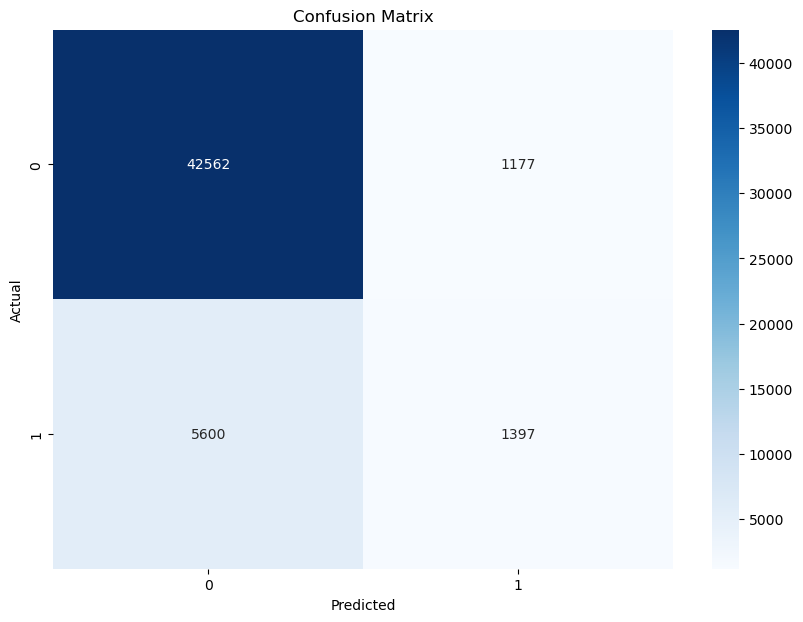

In [18]:
# Plotting the confusion matrix heatmap for Random Forest
plt.figure(figsize=(10,7))
plt.title("Confusion Matrix")
sns.heatmap(ab_confusion_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [33]:
sensitivity = ab_confusion_matrix[1][1] / (ab_confusion_matrix[1][0] + ab_confusion_matrix[1][1])
specificity = ab_confusion_matrix[0][0] / (ab_confusion_matrix[0][0] + ab_confusion_matrix[0][1])

print("Sensitivity:", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))

Sensitivity: 0.2
Specificity: 0.97


In [19]:
# Compute ROC curve and AUC for Logistic Regression
y_pred_prob_lr = logistic_model.predict_proba(X_test)[:, 1]
falsePositiveRate_lr, truePositiveRate_lr, thresholds_lr = roc_curve(Y_test, y_pred_prob_lr)
roc_auc_lr = auc(falsePositiveRate_lr, truePositiveRate_lr)

# Compute ROC curve and AUC for Random Forest
y_pred_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]
falsePositiveRate_rf, truePositiveRate_rf, thresholds_rf = roc_curve(Y_test, y_pred_prob_rf)
roc_auc_rf = auc(falsePositiveRate_rf, truePositiveRate_rf)

# Compute ROC curve and AUC for AdaBoost
y_pred_prob_ab = adaboost_model.predict_proba(X_test)[:, 1]
falsePositiveRate_ab, truePositiveRate_ab, thresholds_ab = roc_curve(Y_test, y_pred_prob_ab)
roc_auc_ab = auc(falsePositiveRate_ab, truePositiveRate_ab)

fig = go.Figure()

# Logistic Regression ROC Curve
fig.add_trace(go.Scatter(x=falsePositiveRate_lr, y=truePositiveRate_lr, mode='lines', name=f'Logistic Regression (AUC = {roc_auc_lr:.2f})'))

# Random Forest ROC Curve
fig.add_trace(go.Scatter(x=falsePositiveRate_rf, y=truePositiveRate_rf, mode='lines', name=f'Random Forest (AUC = {roc_auc_rf:.2f})'))

# AdaBoost ROC Curve
fig.add_trace(go.Scatter(x=falsePositiveRate_ab, y=truePositiveRate_ab, mode='lines', name=f'AdaBoost (AUC = {roc_auc_ab:.2f})'))

# Add diagonal line for random guessing
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guess', line=dict(dash='dash')))

fig.update_layout(
    title="Receiver Operating Characteristic (ROC) for all models",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
    showlegend=True)

fig.show()